In [1]:
import pandas as pd

In [2]:
siga = pd.read_csv('./stockData/siga.csv')

In [3]:
siga.head()

,code,name,amount
0,a005930,삼성전자,5969783
1,a000660,SK하이닉스,728002
2,a005380,현대차,213668
3,a068270,셀트리온,128329
4,a051910,LG화학,70592


In [4]:
k10_component = list(siga['code'])[:10]
k10_component_name = list(siga['name'])[:10]
k10_component_outstanding = list(siga['amount'])[:10]

In [5]:
print(k10_component)
print(k10_component_name)
print(k10_component_outstanding)

['a005930', 'a000660', 'a005380', 'a068270', 'a051910', 'a012330', 'a005490', 'a055550', 'a207940', 'a017670']
['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', '현대모비스', 'POSCO', '신한지주', '삼성바이오로직스', 'SK텔레콤']
[5969783, 728002, 213668, 128329, 70592, 95307, 87187, 474200, 66165, 80746]


#### 주가 데이터를 읽어온다

In [6]:
for i, symbol in enumerate(k10_component):
    stock = pd.read_csv('./stockData/' + symbol[1:] + '.csv', index_col=0, parse_dates=True)
    stock = stock.sort_index()
    stock = pd.DataFrame(stock['close'])
    stock.columns = [symbol]
    
    if i == 0:
        result = stock.copy()
    else:
        result = pd.concat([result, stock], axis=1)

In [7]:
result.head()

,a005930,a000660,a005380,a068270,a051910,a012330,a005490,a055550,a207940,a017670
date,,,,,,,,,,
2011-05-12,17700,33750,236000,32824,499500,335000,462500,49600,NaN,161000
2011-05-13,18320,34500,229500,32534,491000,337000,465000,47950,NaN,162000
2011-05-16,18020,34400,224000,32148,492000,333000,457500,47200,NaN,164000
2011-05-17,17800,33100,226000,32679,494500,345000,455000,48600,NaN,163500
2011-05-18,17860,32800,238500,33017,513000,351500,460000,48600,NaN,165000


In [8]:
result = result.dropna()

In [9]:
result.head()

,a005930,a000660,a005380,a068270,a051910,a012330,a005490,a055550,a207940,a017670
date,,,,,,,,,,
2016-11-10,32980,41000,129000,97957,241000,248000,247000,44000,144000.0,220000
2016-11-11,31960,39850,131500,96030,236500,245000,249500,45600,161500.0,218500
2016-11-14,31060,39700,132000,95387,235500,243000,252000,45050,175500.0,217000
2016-11-15,30780,39700,130500,94469,240500,242500,254000,45150,166000.0,217500
2016-11-16,31160,40850,131000,96489,238000,242500,253500,44500,170000.0,217000


In [10]:
result.tail()

,a005930,a000660,a005380,a068270,a051910,a012330,a005490,a055550,a207940,a017670
date,,,,,,,,,,
2019-06-19,45350,67200,140000,211500,348500,223500,242000,46000,315000.0,263000
2019-06-20,45500,67300,140500,214000,352000,224000,242000,45000,317000.0,260500
2019-06-21,45700,65900,140500,212500,348000,226000,243500,44900,317000.0,262000
2019-06-24,45500,66900,142500,208500,348500,229000,244500,44850,321500.0,260000
2019-06-25,45450,66900,140500,205500,351500,231000,244000,44700,313500.0,260500


In [23]:
result.to_csv('./stockData/k10StockPrice.csv')

In [11]:
k10_component_outstanding

[5969783, 728002, 213668, 128329, 70592, 95307, 87187, 474200, 66165, 80746]

In [12]:
k10_historical_mc = result * k10_component_outstanding

In [13]:
k10_historical_mc.tail()

,a005930,a000660,a005380,a068270,a051910,a012330,a005490,a055550,a207940,a017670
date,,,,,,,,,,
2019-06-19,270729659050,48921734400,29913520000,27141583500,24601312000,21301114500,21099254000,21813200000,2.084198e+10,21236198000
2019-06-20,271625126500,48994534600,30020354000,27462406000,24848384000,21348768000,21099254000,21339000000,2.097430e+10,21034333000
2019-06-21,272819083100,47975331800,30020354000,27269912500,24566016000,21539382000,21230034500,21291580000,2.097430e+10,21155452000
2019-06-24,271625126500,48703333800,30447690000,26756596500,24601312000,21825303000,21317221500,21267870000,2.127205e+10,20993960000
2019-06-25,271326637350,48703333800,30020354000,26371609500,24813088000,22015917000,21273628000,21196740000,2.074273e+10,21034333000


In [15]:
k10_historical_mc.to_csv('./stockData/k10SigaPrice.csv')

In [16]:
k10 = pd.DataFrame()
k10['K10 Market Cap'] = k10_historical_mc.sum(axis=1)
k10.head()

,K10 Market Cap
date,
2016-11-10,3.772061e+11
2016-11-11,3.719765e+11
2016-11-14,3.670199e+11
2016-11-15,3.648490e+11
2016-11-16,3.680167e+11


In [17]:
k10['K10'] = k10['K10 Market Cap'] / k10['K10 Market Cap'][0] * 100
k10.head()

,K10 Market Cap,K10
date,,
2016-11-10,3.772061e+11,100.000000
2016-11-11,3.719765e+11,98.613588
2016-11-14,3.670199e+11,97.299573
2016-11-15,3.648490e+11,96.724041
2016-11-16,3.680167e+11,97.563838


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\seong\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


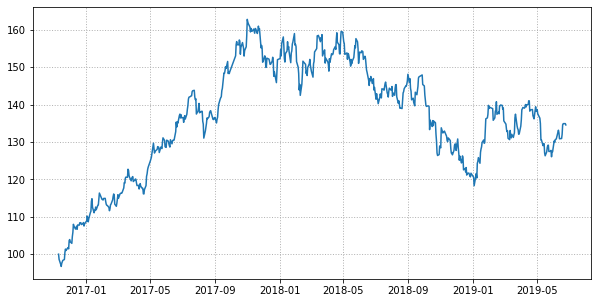

In [19]:
plt.figure(figsize=(10,5))
plt.plot(k10['K10'])
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.show()

In [20]:
kp200 = pd.read_csv('./stockData/kospi200.csv', index_col=0, parse_dates=True)
kp200 = kp200.sort_index()
kp200 = kp200['2016-11-10':]
kp200['kp200_index'] = kp200['kpi200'] / kp200['kpi200'].loc['2016-11-10'] * 100
kp200['K10'] = k10['K10']
kp200 = kp200.dropna()

In [21]:
kp200.head()

,kpi200,kp200_index,K10
Date,,,
2016-11-10,255.31,100.000000,100.000000
2016-11-11,251.99,98.699620,98.613588
2016-11-14,250.01,97.924092,97.299573
2016-11-15,249.20,97.606831,96.724041
2016-11-16,250.32,98.045513,97.563838


In [22]:
kp200.to_csv('./stockData/k10_kp200.csv')

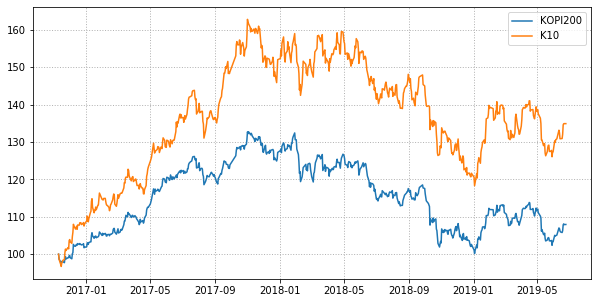

In [67]:
plt.figure(figsize=(10,5))
plt.plot(kp200['kp200_index'], label='KOPI200')
plt.plot(kp200['K10'], label='K10')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.show()

In [69]:
kp200['spread'] = kp200['K10'] - kp200['kp200_index']

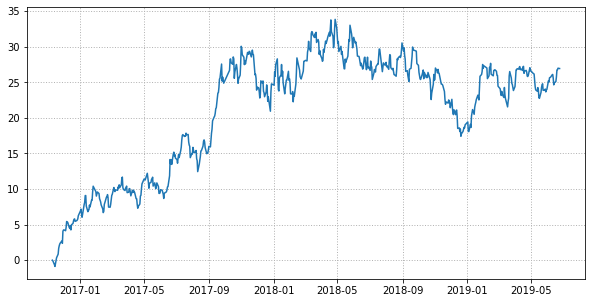

In [71]:
plt.figure(figsize=(10,5))
plt.plot(kp200['spread'])
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.show()